#**Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data
df_1 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/employee_survey_data.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/general_data.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/manager_survey_data.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/in_time.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/out_time.csv')

In [ ]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df_1.sample(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
2570,2571,3.0,4.0,3.0
832,833,3.0,1.0,3.0
3400,3401,4.0,1.0,3.0
1167,1168,2.0,4.0,3.0
218,219,4.0,2.0,3.0


In [ ]:
df_2.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1150,23,No,Travel_Rarely,Research & Development,7,3,Life Sciences,1,1151,Male,...,1.0,Y,11,8,1,5.0,2,5,1,4
3880,33,No,Non-Travel,Research & Development,18,2,Medical,1,3881,Female,...,1.0,Y,13,8,0,7.0,6,6,1,2
2246,45,No,Travel_Rarely,Sales,10,2,Marketing,1,2247,Male,...,2.0,Y,14,8,0,24.0,1,7,0,7
1778,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,1779,Male,...,4.0,Y,13,8,1,8.0,2,5,1,3
1409,42,No,Non-Travel,Research & Development,1,1,Technical Degree,1,1410,Male,...,2.0,Y,11,8,1,11.0,2,5,0,2


In [ ]:
df_3.sample(5)

,EmployeeID,JobInvolvement,PerformanceRating
3838,3839,3,3
3529,3530,3,3
1266,1267,3,4
926,927,3,3
1323,1324,3,3


In [ ]:
df_4.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
977,978,NaN,2015-01-02 10:34:58,2015-01-05 10:03:23,2015-01-06 10:20:07,2015-01-07 09:58:34,NaN,2015-01-09 10:16:47,2015-01-12 09:52:41,2015-01-13 10:07:02,...,2015-12-18 09:55:04,2015-12-21 09:44:10,NaN,2015-12-23 10:02:51,2015-12-24 10:15:54,NaN,2015-12-28 09:54:34,2015-12-29 10:34:19,2015-12-30 10:19:16,2015-12-31 10:10:40
138,139,NaN,2015-01-02 10:10:35,2015-01-05 09:41:03,2015-01-06 10:34:38,2015-01-07 10:15:12,2015-01-08 10:04:32,2015-01-09 09:49:03,2015-01-12 09:59:22,2015-01-13 10:12:07,...,2015-12-18 09:55:58,2015-12-21 09:26:11,2015-12-22 10:32:42,2015-12-23 10:08:01,2015-12-24 10:09:05,NaN,2015-12-28 09:57:14,2015-12-29 10:20:55,2015-12-30 10:02:26,2015-12-31 10:11:52
3732,3733,NaN,2015-01-02 09:56:21,2015-01-05 09:42:00,2015-01-06 09:50:51,2015-01-07 10:49:25,2015-01-08 09:53:45,2015-01-09 10:07:44,2015-01-12 09:53:04,2015-01-13 09:34:33,...,2015-12-18 10:43:07,2015-12-21 10:12:35,2015-12-22 10:10:31,2015-12-23 09:31:06,2015-12-24 09:44:11,NaN,2015-12-28 10:33:40,2015-12-29 10:02:08,2015-12-30 10:00:51,2015-12-31 10:29:51
3784,3785,NaN,2015-01-02 09:33:38,2015-01-05 09:59:25,2015-01-06 09:55:06,2015-01-07 09:49:24,2015-01-08 09:31:52,2015-01-09 09:49:45,2015-01-12 09:39:01,2015-01-13 09:53:41,...,2015-12-18 10:10:52,2015-12-21 09:59:16,2015-12-22 10:11:57,2015-12-23 10:11:50,2015-12-24 10:13:05,NaN,2015-12-28 09:34:14,2015-12-29 10:01:24,2015-12-30 10:22:26,2015-12-31 09:54:35
2058,2059,NaN,2015-01-02 09:50:47,2015-01-05 10:10:39,2015-01-06 10:11:53,2015-01-07 10:34:43,2015-01-08 10:02:37,2015-01-09 10:08:31,2015-01-12 10:02:27,2015-01-13 09:36:55,...,2015-12-18 10:20:49,2015-12-21 10:15:38,2015-12-22 10:04:38,2015-12-23 10:02:12,2015-12-24 10:19:01,NaN,2015-12-28 10:13:30,2015-12-29 09:49:50,2015-12-30 10:10:37,2015-12-31 09:39:37


In [ ]:
df_5.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
459,460,NaN,2015-01-02 17:47:07,2015-01-05 17:15:58,2015-01-06 17:15:36,2015-01-07 16:56:31,2015-01-08 17:26:02,2015-01-09 17:06:42,2015-01-12 17:28:58,2015-01-13 16:19:25,...,2015-12-18 16:40:48,2015-12-21 17:22:00,2015-12-22 16:49:32,2015-12-23 17:04:47,2015-12-24 17:01:37,NaN,2015-12-28 16:45:06,2015-12-29 16:56:55,2015-12-30 17:05:06,2015-12-31 17:18:18
2209,2210,NaN,2015-01-02 19:36:32,2015-01-05 19:38:40,2015-01-06 19:37:09,2015-01-07 19:47:13,2015-01-08 19:33:21,2015-01-09 20:41:41,2015-01-12 19:24:53,2015-01-13 20:15:18,...,2015-12-18 20:16:25,2015-12-21 20:39:47,2015-12-22 20:37:31,2015-12-23 19:47:18,2015-12-24 19:48:35,NaN,2015-12-28 20:23:14,2015-12-29 19:33:37,2015-12-30 19:53:40,2015-12-31 20:29:02
3487,3488,NaN,2015-01-02 16:49:49,2015-01-05 15:47:19,2015-01-06 15:50:59,2015-01-07 15:33:20,2015-01-08 15:39:25,2015-01-09 15:45:31,2015-01-12 16:25:10,2015-01-13 15:40:17,...,2015-12-18 15:55:35,2015-12-21 15:32:49,2015-12-22 15:40:03,2015-12-23 16:14:56,2015-12-24 16:03:19,NaN,2015-12-28 15:54:35,2015-12-29 15:34:17,2015-12-30 16:10:23,2015-12-31 16:19:40
4080,4081,NaN,2015-01-02 17:58:03,2015-01-05 18:37:37,2015-01-06 17:10:40,2015-01-07 17:10:00,2015-01-08 17:52:08,2015-01-09 18:28:43,2015-01-12 18:07:05,2015-01-13 18:09:24,...,2015-12-18 17:57:13,2015-12-21 18:19:19,2015-12-22 17:16:41,2015-12-23 16:39:37,2015-12-24 18:18:23,NaN,2015-12-28 18:17:53,2015-12-29 18:23:13,2015-12-30 18:05:37,2015-12-31 17:53:32
3874,3875,NaN,2015-01-02 19:34:09,2015-01-05 19:51:40,2015-01-06 19:27:39,2015-01-07 20:22:08,2015-01-08 19:48:37,2015-01-09 19:44:48,2015-01-12 19:19:39,2015-01-13 19:52:20,...,2015-12-18 19:34:13,2015-12-21 18:49:31,NaN,NaN,2015-12-24 19:39:42,NaN,2015-12-28 19:50:36,2015-12-29 19:00:25,2015-12-30 19:39:16,2015-12-31 20:17:08


In [ ]:
#Menggabungkan (merge) df_1, df_2, dan df_3
df_merge = pd.merge(df_1, df_2, on = 'EmployeeID')
df_merge = pd.merge(df_merge, df_3, on = 'EmployeeID')
df_merge.sample(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
3939,3940,1.0,3.0,3.0,31,Yes,Travel_Rarely,Human Resources,9,4,...,14,8,2,10.0,2,1,0,0,3,3
1032,1033,4.0,1.0,2.0,34,Yes,Travel_Frequently,Research & Development,2,1,...,23,8,2,11.0,2,7,0,7,4,4
3195,3196,4.0,3.0,3.0,20,Yes,Travel_Rarely,Research & Development,1,3,...,12,8,3,1.0,2,1,1,1,2,3
518,519,4.0,4.0,3.0,20,Yes,Travel_Frequently,Sales,8,3,...,20,8,0,2.0,3,2,0,2,2,4
2179,2180,2.0,2.0,3.0,40,No,Travel_Rarely,Research & Development,14,4,...,22,8,0,7.0,2,4,0,3,1,4


In [ ]:
df_merge.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

#**Exploratory Data Analysis (EDA)**

##1. Descriptive Statistics

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

In [ ]:
#Mengubah tipe data menjadi kategorikal untuk 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Education', 'JobLevel', 'StockOptionLevel', 'JobInvolvement' dan 'PerformanceRating'
columns1 = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Education', 'JobLevel', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating']
for col in columns1:
  df_merge[col] = df_merge[col].astype('category')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   category
 2   JobSatisfaction          4390 non-null   category
 3   WorkLifeBalance          4372 non-null   category
 4   Age                      4410 non-null   int64   
 5   Attrition                4410 non-null   object  
 6   BusinessTravel           4410 non-null   object  
 7   Department               4410 non-null   object  
 8   DistanceFromHome         4410 non-null   int64   
 9   Education                4410 non-null   category
 10  EducationField           4410 non-null   object  
 11  EmployeeCount            4410 non-null   int64   
 12  Gender                   4410 non-null   object  
 13  JobLevel                 4410 non-null   category
 14  JobRole 

In [ ]:
#Memisahkan features kategorik, numerik dan target
numericals = ['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categoricals = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating']
target = ['Attrition']

In [ ]:
df_merge[numericals].describe()

,Age,DistanceFromHome,EmployeeCount,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.0,4410.000000,4391.000000,4410.000000,4410.0,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,1.0,65029.312925,2.694830,15.209524,8.0,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,0.0,47068.888559,2.498887,3.659108,0.0,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.0,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,29110.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,49190.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,83800.000000,4.000000,18.000000,8.0,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
df_merge[categoricals].describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,Over18,StockOptionLevel,JobInvolvement,PerformanceRating
count,4385.0,4390.0,4372.0,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410,4410
unique,4.0,4.0,4.0,3,3,5,6,2,5,9,3,1,4,4,2
top,3.0,4.0,3.0,Travel_Rarely,Research & Development,3,Life Sciences,Male,1,Sales Executive,Married,Y,0,3,3
freq,1350.0,1367.0,2660.0,3129,2883,1716,1818,2646,1629,978,2019,4410,1893,2604,3732


In [ ]:
df_merge[target].describe()

,Attrition
count,4410
unique,2
top,No
freq,3699


In [ ]:
df_merge.isnull().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0


**Hasil Observasi:**

A. Kolom 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Education', 'JobLevel', 'JobInvolvement', dan 'PerformanceRating' memiliki tipe data float64 dan int64, sehingga diubah tipe datanya menjadi tipe category untuk memudahkan analisis dan pengolahan data.

B. Terdapat beberapa kolom yang memiliki nilai kosong.
*   EnvironmentSatisfaction: 25 nilai kosong
*   JobSatisfaction: 20 nilai kosong
*   WorkLifeBalance: 38 nilai kosong
*   NumCompaniesWorked: 19 nilai kosong
*   TotalWorkingYears: 9 nilai kosong

C. Dari tabel statistik deskriptif yang ditampilkan, berikut adalah beberapa kolom yang perlu diperhatikan:
* **EmployeeCount:** minimum, maksimum, mean, dan nilai kuartilnya semua bernilai 1.0. Hal ini menunjukkan bahwa semua entri memiliki nilai yang sama yaitu 1, sehingga kolom ini tidak bervariasi dan tidak informatif untuk digunakan dalam analisis.

* **StandardHours:** minimum, maksimum, mean, dan nilai kuartilnya semua bernilai 8.0. Hal ini menunjukkan bahwa semua entri memiliki jam kerja standar yang sama, sehingga kolom ini tidak bervariasi dan tidak informatif untuk digunakan dalam analisis.

* **BusinessTravel**: total baris 4410 dengan nilai unique paling banyak adalah 'Travel_Rarely' sejumlah 3129. Hal ini menunjukkan bahwa hampir 71% data kolom berisi 'Travel_Rarely'.

* **Department**: total baris 4410 dengan nilai unique paling banyak adalah 'Research & Development' sejumlah 3129. Hal ini menunjukkan bahwa hampir 65% data kolom berisi 'Research & Development'.

* **Over18**: total baris 4410 dengan total nilai unique 1 yaitu 'Y' sejumlah 4410. Hal ini menunjukkan bahwa semua data kolom berisi 'Y', sehingga kolom ini tidak bervariasi dan tidak informatif untuk digunakan dalam analisis.

* **Attrition**: total baris 4410 dengan nilai unique paling banyak adalah 'No' sejumlah 3699. Hal ini menunjukkan bahwa hampir 84% data kolom berisi 'No', sehingga terjadi class imbalance pada target.

##2. Univariate Analysis

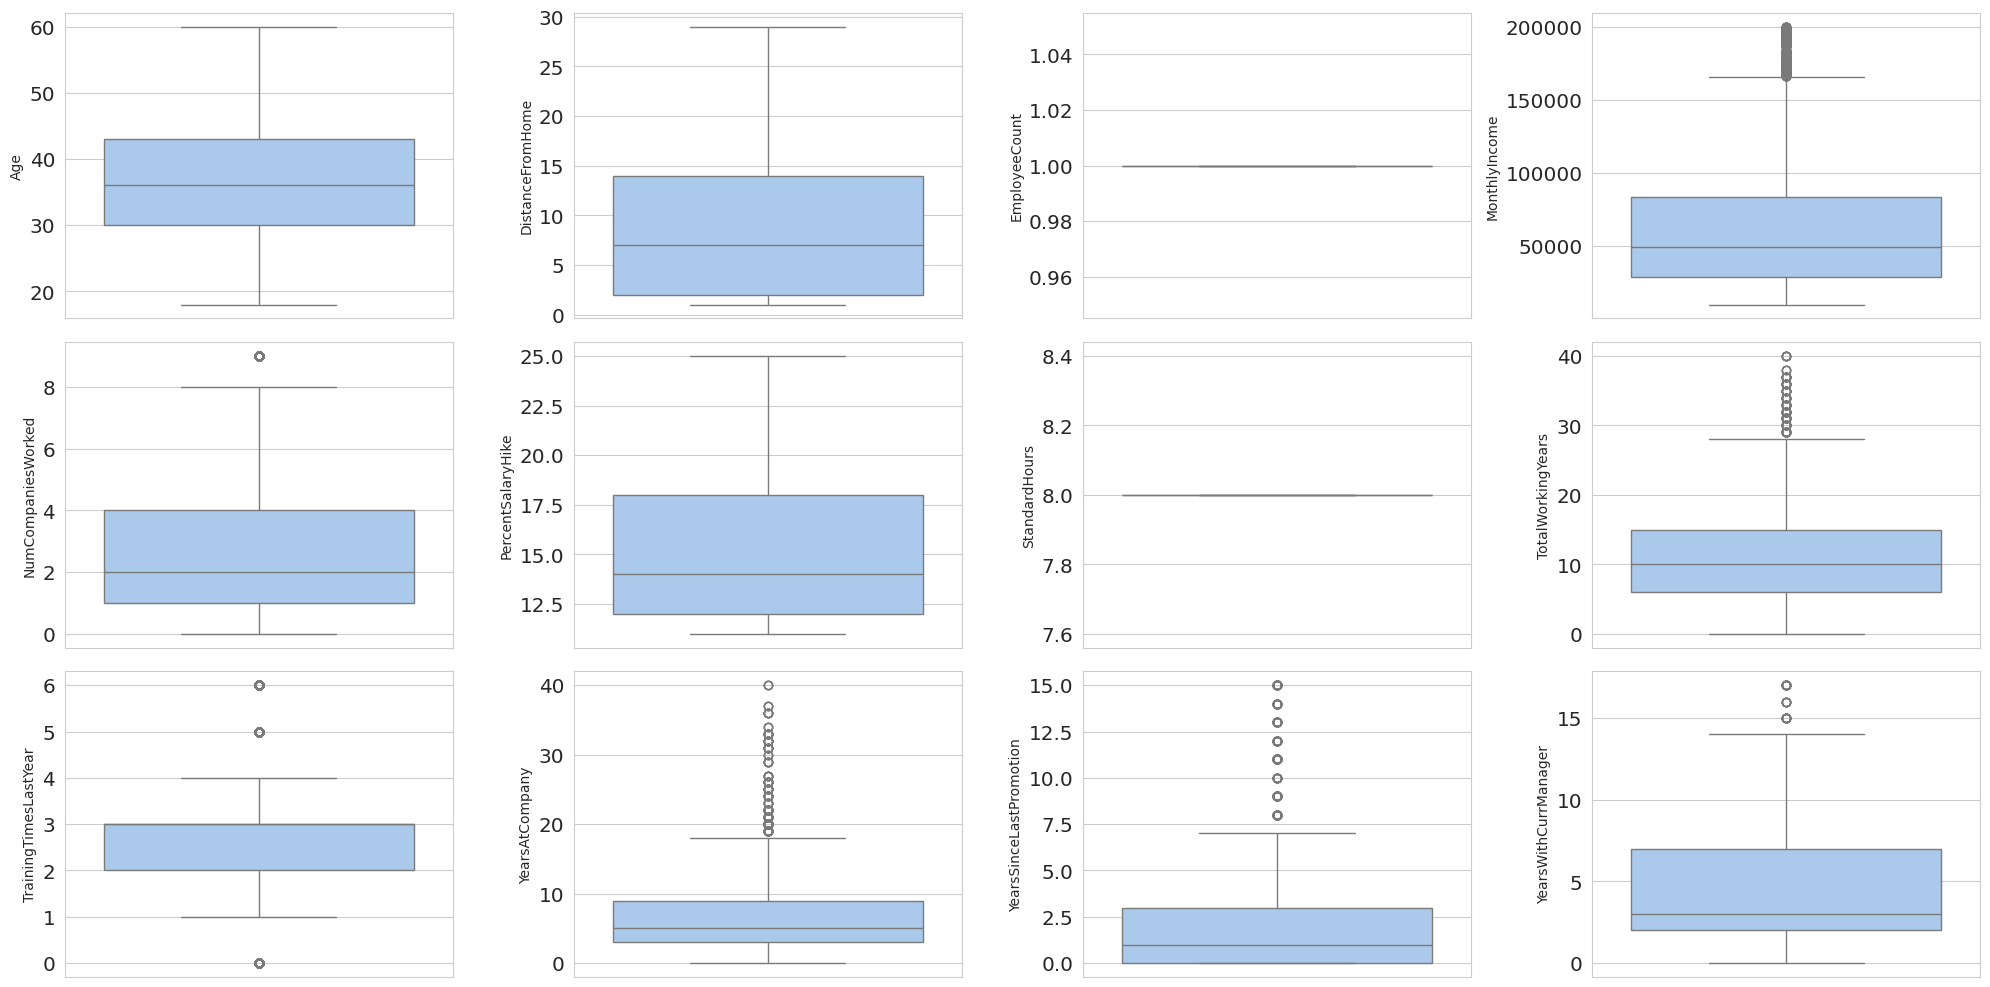

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom numerik yang akan divisualisasikan
numericals = ['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Membuat subplots untuk masing-masing kolom numerik
plt.figure(figsize = (20, 10))
for i in range(len(numericals)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(df_merge[numericals[i]], palette = 'pastel', orient = 'v') #Boxplot
    plt.xlabel('')

plt.tight_layout()
plt.show()

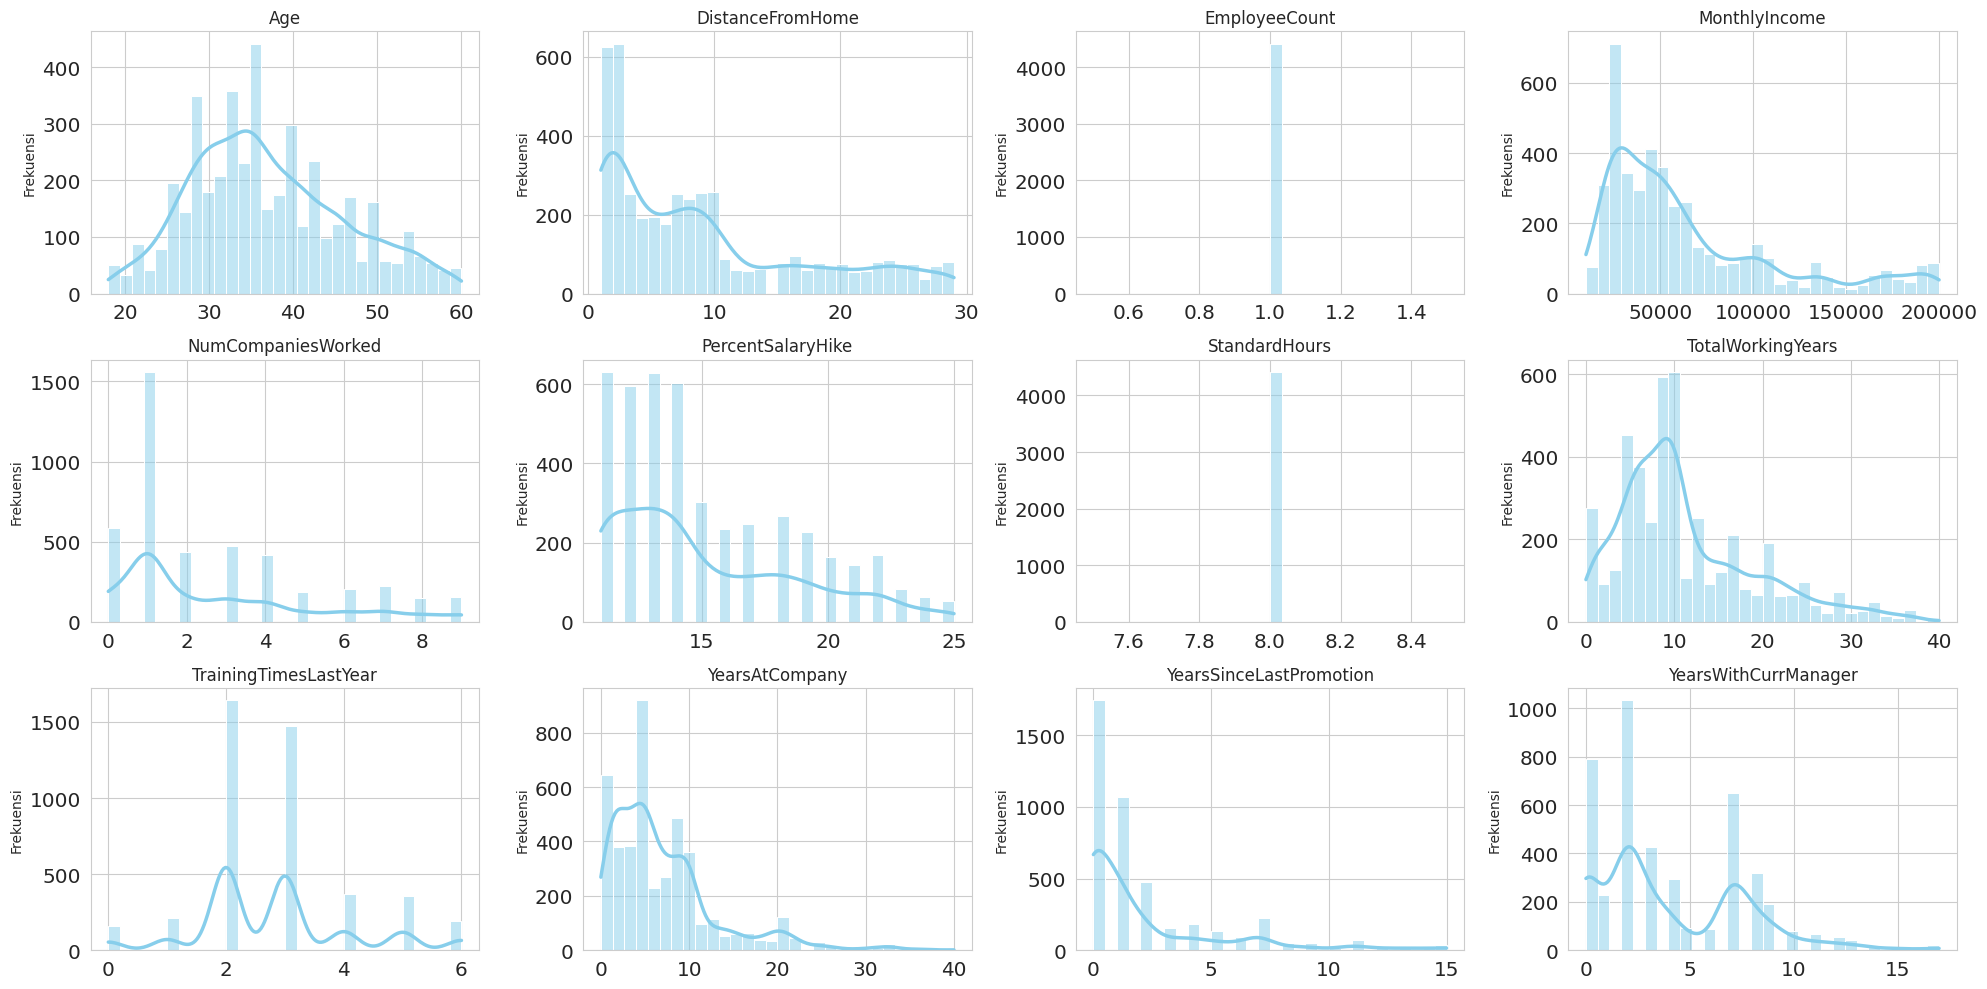

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom numerik yang akan divisualisasikan
numericals = ['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike','StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Membuat subplots untuk masing-masing kolom numerik
plt.figure(figsize = (20, 10))
for i in range(len(numericals)):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_merge[numericals[i]], bins = 30, kde = True, color = 'skyblue')  #Histogram dengan KDE
    plt.title(numericals[i])
    plt.xlabel('')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Hasil Observasi Data Numerik**

1. Age: berdistribusi positively skewed dengan modus sekitar usia rentang 30-40. Ini menunjukkan mayoritas karyawan berada pada rentang usia muda hingga menengah, dengan sedikit karyawan yang usianya mendekati 60 tahun.

2. DistanceFromHome: berdistribusi positively skewed. Sebagian besar karyawan tinggal relatif dekat dari kantor (0-10 kms).

3. EmployeeCount dan StandardHours: distribusi kolom ini konstan pada nilai 1 dan 8, yang menunjukkan bahwa kedua kolom ini sebenarnya tidak memberikan informasi yang bervariasi.

4. MonthlyIncome: berdistribusi positively skewed dengan beberapa nilai yang sangat tinggi sebagai outlier. Ini menunjukkan ada beberapa karyawan dengan gaji yang jauh di atas rata-rata.

5. NumCompaniesWorked: berdistribusi positively skewed dengan mayoritas karyawan hanya pernah bekerja di 0-4 perusahaan sebelum ini.

6. PercentSalaryHike: berdistribusi positively skewed, menunjukkan kebanyakan karyawan mendapat kenaikan gaji yang kecil hingga sedang, dengan beberapa yang mendapatkan persentase kenaikan lebih besar.

7. TotalWorkingYears: berdistribusi positively skewed dengan beberapa nilai yang tinggi sebagai outlier. Outlier ini mungkin karyawan dengan pengalaman sangat panjang di berbagai perusahaan.

8. TrainingTimesLastYear: berdistribusi bimodal dengan beberapa puncak pada nilai rendah (2 atau 3 kali pelatihan).

9. YearsAtCompany: berdistribusi positively skewed dengan modus di nilai 5 tahun. Banyak karyawan yang baru beberapa tahun bekerja di perusahaan ini, sedangkan hanya sedikit yang memiliki masa kerja sangat panjang (lebih dari 20 tahun).

10. YearsSinceLastPromotion: berdistribusi positively skewed. Sebagian besar karyawan baru saja atau belum lama mendapatkan promosi, dengan hanya beberapa yang lama tidak dipromosikan.

11. YearsWithCurrManager: berdistribusi positively skewed, menunjukkan sebagian besar karyawan belum lama bekerja dengan manajer mereka saat ini.


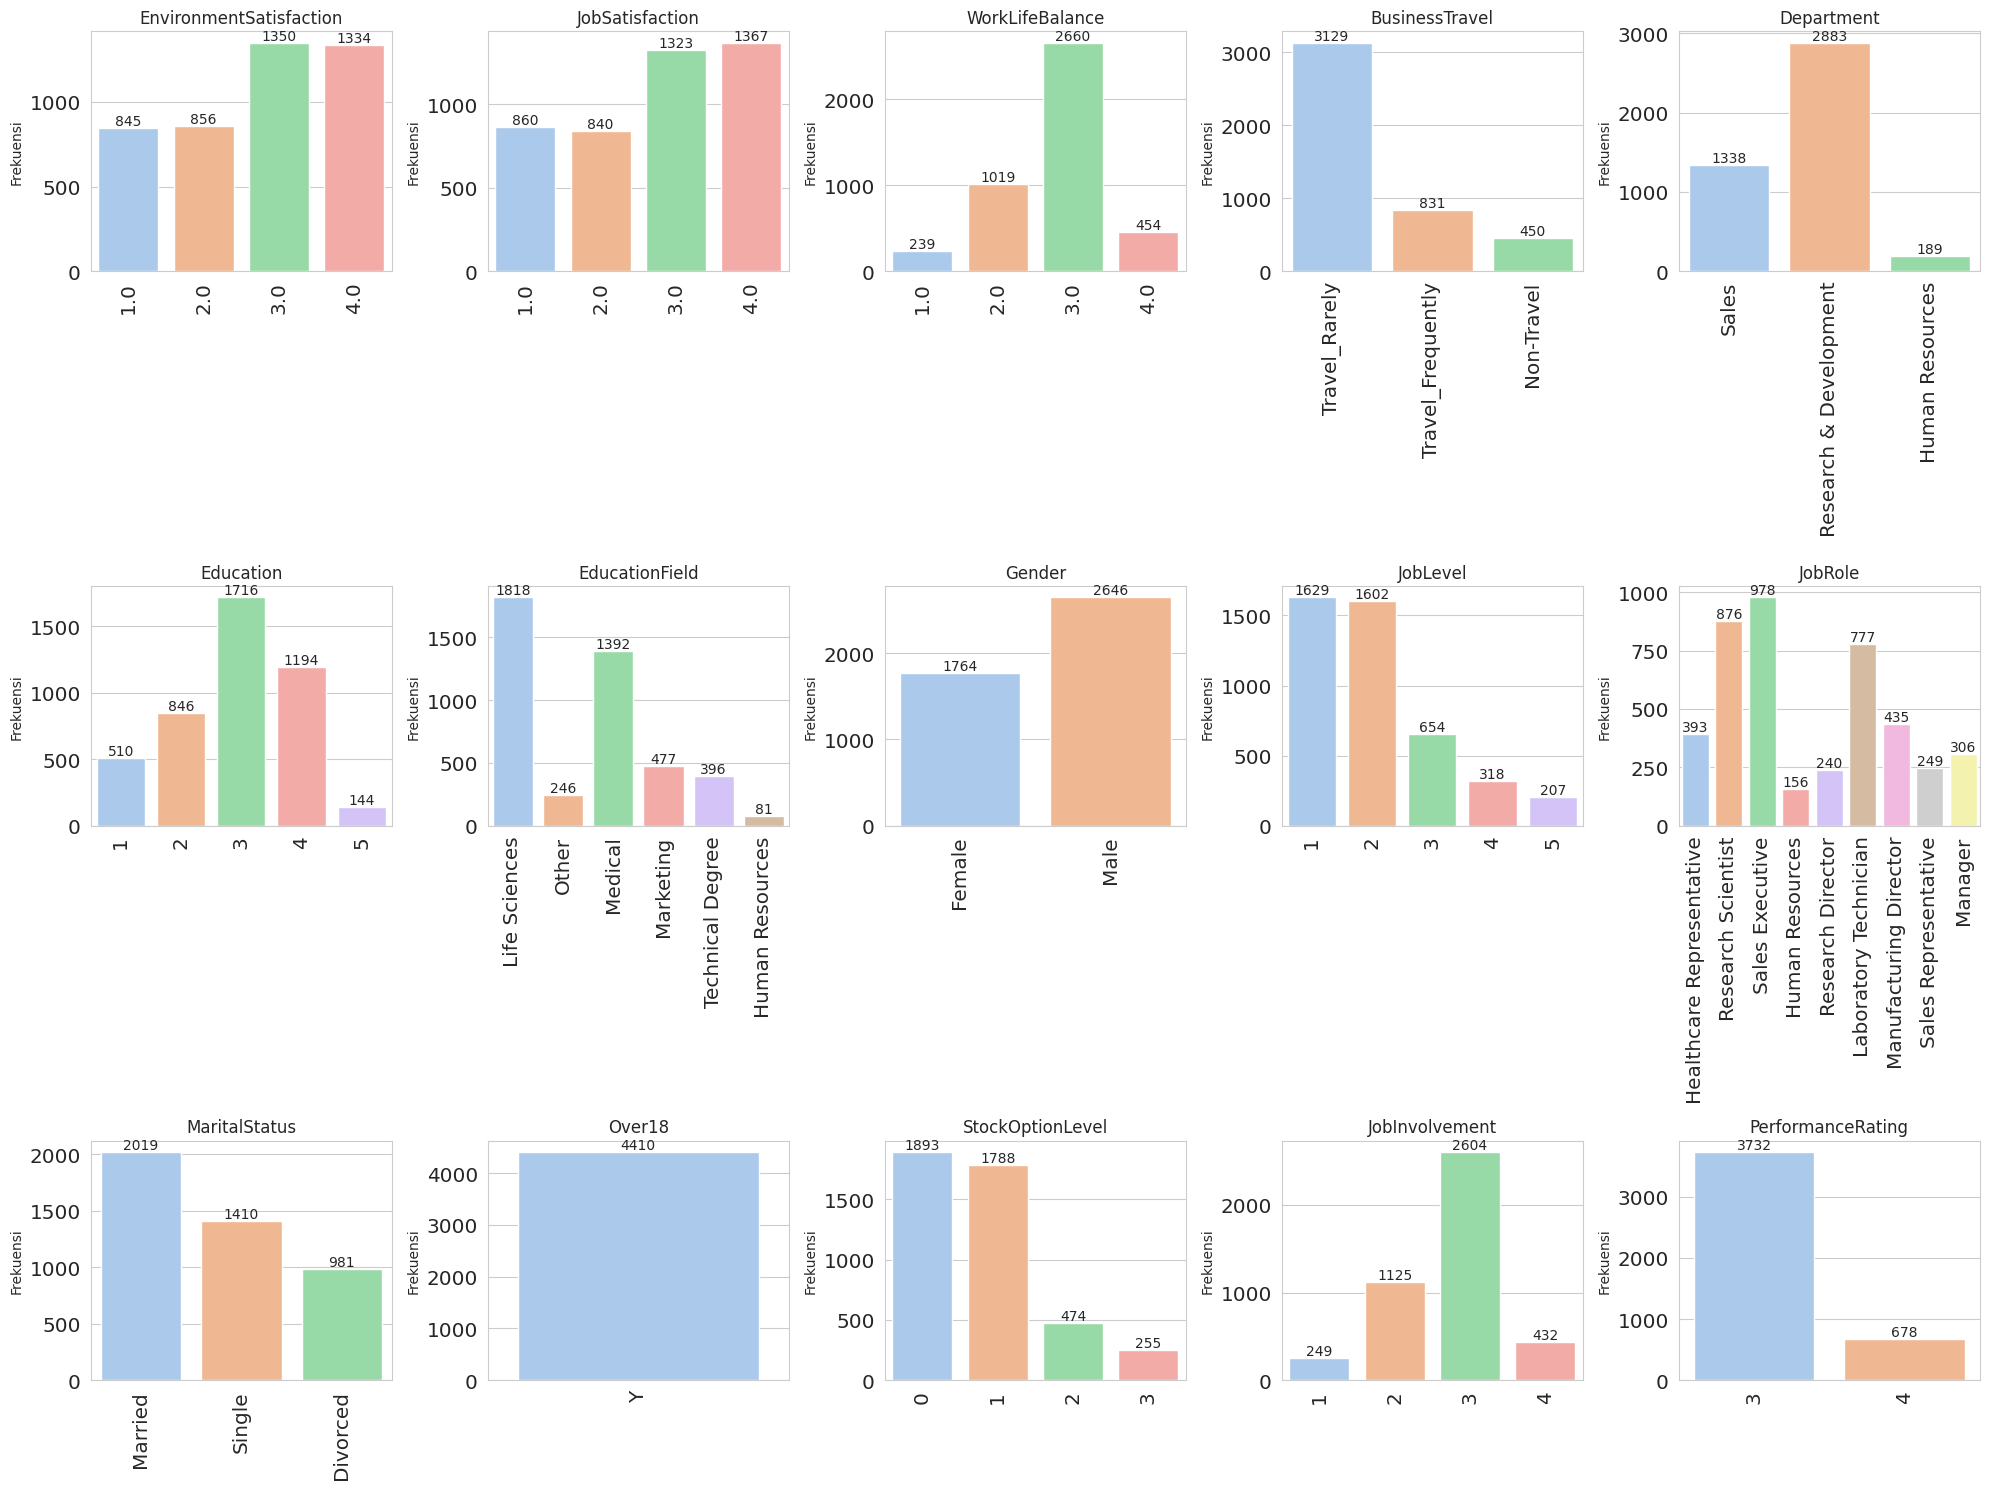

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom kategorikal yang akan divisualisasikan
categoricals = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel',
                'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
                'MaritalStatus', 'Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating']


#Membuat subplots untuk masing-masing kolom kategorikal
plt.figure(figsize = (20, 15))
for i in range(len(categoricals)):
    plt.subplot(3, 5, i + 1)
    ax = sns.countplot(data = df_merge, x = categoricals[i], palette = 'pastel')
    plt.title(categoricals[i])
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Frekuensi')

    #Menambahkan jumlah di atas setiap batang
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom',
                    fontsize = 10)

plt.tight_layout()
plt.show()

**Hasil Observasi Data Kategorikal**

1. BusinessTravel: Kategori 'Travel_Rarely' mendominasi dengan jumlah terbesar, sedangkan 'Non-Travel' memiliki jumlah paling sedikit. Distribusi ini menunjukkan pola mayoritas karyawan tidak sering bepergian.

2. Department: Mayoritas karyawan berada di departemen 'Research & Development', sedangkan 'Human Resources' memiliki jumlah terendah.

3. EducationField: Mayoritas karyawan berada di bidang 'Life Sciences' dan 'Medical'.

4. Gender: Karyawan pria lebih banyak daripada karyawan wanita.

5. JobRole: Variasi cukup besar, dengan jumlah karyawan terbesar di peran 'Sales Executive', 'Research Scientist' dan 'Laboratory Technician'.

6. MaritalStatus: 'Married' merupakan status pernikahan dominan.

7. Over18: Seluruh karyawan berada pada kategori 'Y' yang menunjukkan bahwa variabel ini kurang bermanfaat untuk dianalisis karena tidak memiliki variasi.

8. EnvironmentSatisfaction dan JobSatisfaction: Kecenderungan skor yang lebih tinggi (3 dan 4) lebih banyak.

9. WorkLifeBalance: Skor '3' memiliki jumlah terbesar, menunjukkan mayoritas merasa cukup puas dengan keseimbangan hidup kerja.

10. JobInvolvement: Dominan pada nilai '3' dan skor rendah sangat jarang.

11. PerformanceRating: Mayoritas berada pada nilai '3' sedangkan hanya sebagian kecil yang memiliki rating '4'. Distribusi ini menunjukkan skor evaluasi kinerja yang tinggi jarang diberikan.


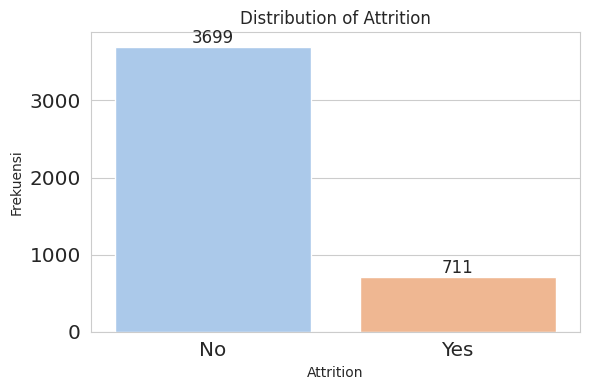

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom target
target = ['Attrition']

# Membuat plot untuk kolom Attrition
plt.figure(figsize = (6, 4))
ax = sns.countplot(data = df_merge, x = target[0], palette = 'pastel')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frekuensi')

# Menambahkan jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom',
                fontsize = 12)

plt.tight_layout()
plt.show()

**Hal yang harus di follow-up saat data pre-processing:**

1. Handle missing value: membuang baris-baris dengan data yang hilang jika dirasa data yang dimiliki sudah cukup dan jumlah data yang hilang tidak signifikan atau mengisi kolom yang kosong dengan modus/median
2. Meng-handle outliers
3. Feature Selection: kolom EmployeeCount, StandardHours dan Over18 dapat di-drop karena tidak memiliki variabilitas
4. Melakukan One-Hot encoding terhadap feature kategorik
5. Handle class imbalance dari target

##2. Bivariate Analysis

In [ ]:
import plotly.express as px

# Mengelompokkan data berdasarkan Department dan MaritalStatus, serta menghitung attrition rate
plot_df = df_merge.groupby(['MaritalStatus', 'Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Menggunakan palet pastel dari Plotly
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
             text='Percent', opacity=.75, facet_col="MaritalStatus", category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Menggunakan palet pastel

# Memperbarui trace untuk menampilkan persentase
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), width=.4)

# Mengatur layout dan tampilan grafik
fig.update_layout(title_text='Attrition Rates by Department and Marital Status', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True, tickangle=30)
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

# Menampilkan grafik
fig.show()

In [ ]:
import plotly.express as px

# Mengelompokkan data berdasarkan Department dan BusinessTravel, serta menghitung attrition rate
plot_df = df_merge.groupby(['BusinessTravel', 'Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Menggunakan palet pastel dari Plotly
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
             text='Percent', opacity=.75, facet_col="BusinessTravel", category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Menggunakan palet pastel

# Memperbarui trace untuk menampilkan persentase
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), width=.4)

# Mengatur layout dan tampilan grafik
fig.update_layout(title_text='Attrition Rates by Department and Business Travel', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True, tickangle=30)
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

# Menampilkan grafik
fig.show()

In [ ]:
import plotly.express as px

# Mengelompokkan data berdasarkan Department dan YearsSinceLastPromotion, serta menghitung attrition rate
plot_df = df_merge.groupby(['Department', 'YearsSinceLastPromotion'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()

# Menggunakan palet pastel dari Plotly
fig = px.bar(plot_df, x="YearsSinceLastPromotion", y="Percent", color="Attrition", barmode="group",
             text='Percent', opacity=.75, facet_col="Department", category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Menggunakan palet pastel

# Memperbarui trace untuk menampilkan persentase
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), width=.4)

# Mengatur layout dan tampilan grafik
fig.update_layout(title_text='Attrition Rates by Department and Promotion Gap', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True, tickangle=30)
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

# Menampilkan grafik
fig.show()

In [ ]:
import plotly.express as px

# Mengelompokkan data berdasarkan Department dan JobSatisfaction, serta menghitung attrition rate
plot_df1 = df_merge.groupby(['Department', 'JobSatisfaction'])['Attrition'].value_counts(normalize=True)
plot_df1 = plot_df1.mul(100).rename('Percent').reset_index()

# Menggunakan palet pastel dari Plotly
fig1 = px.bar(plot_df1, x="JobSatisfaction", y="Percent", color="Attrition", barmode="group",
              text='Percent', opacity=.75, facet_col="Department", category_orders={'Attrition': ['Yes', 'No']},
              color_discrete_sequence=px.colors.qualitative.Pastel)  # Menggunakan palet pastel

# Memperbarui trace untuk menampilkan persentase
fig1.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                   marker_line=dict(width=1, color='#28221D'), width=.4)

# Mengatur layout dan tampilan grafik
fig1.update_layout(title_text='Attrition Rates by Department and Job Satisfaction', yaxis_ticksuffix = '%',
                   paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                   height=500, xaxis=dict(tickangle=30))
fig1.update_xaxes(showticklabels=True, tickangle=30)
fig1.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

# Menampilkan grafik
fig1.show()

##3. Multivariate Analysis

In [ ]:
#Mengubah tipe data target 'Attrition' ke numerik
df_merge['Attrition'] = df_merge['Attrition'].map({'Yes': 1, 'No': 0})

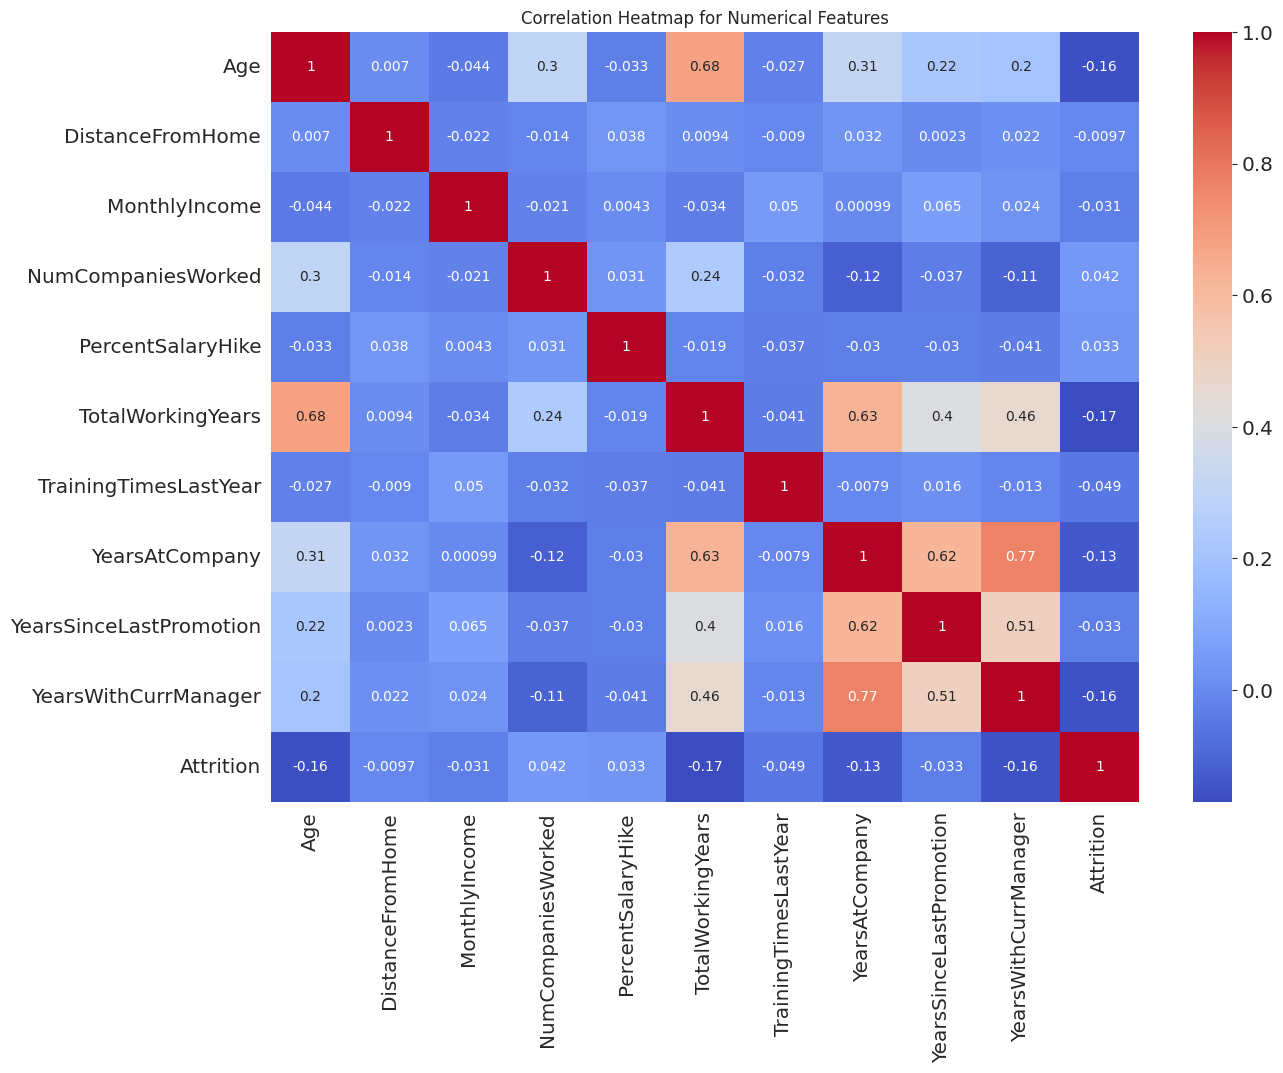

In [ ]:
numericals_target = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                     'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'Attrition']

#Membuat heatmap korelasi
plt.figure(figsize = (14, 10))
correlation_matrix = df_merge[numericals_target].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

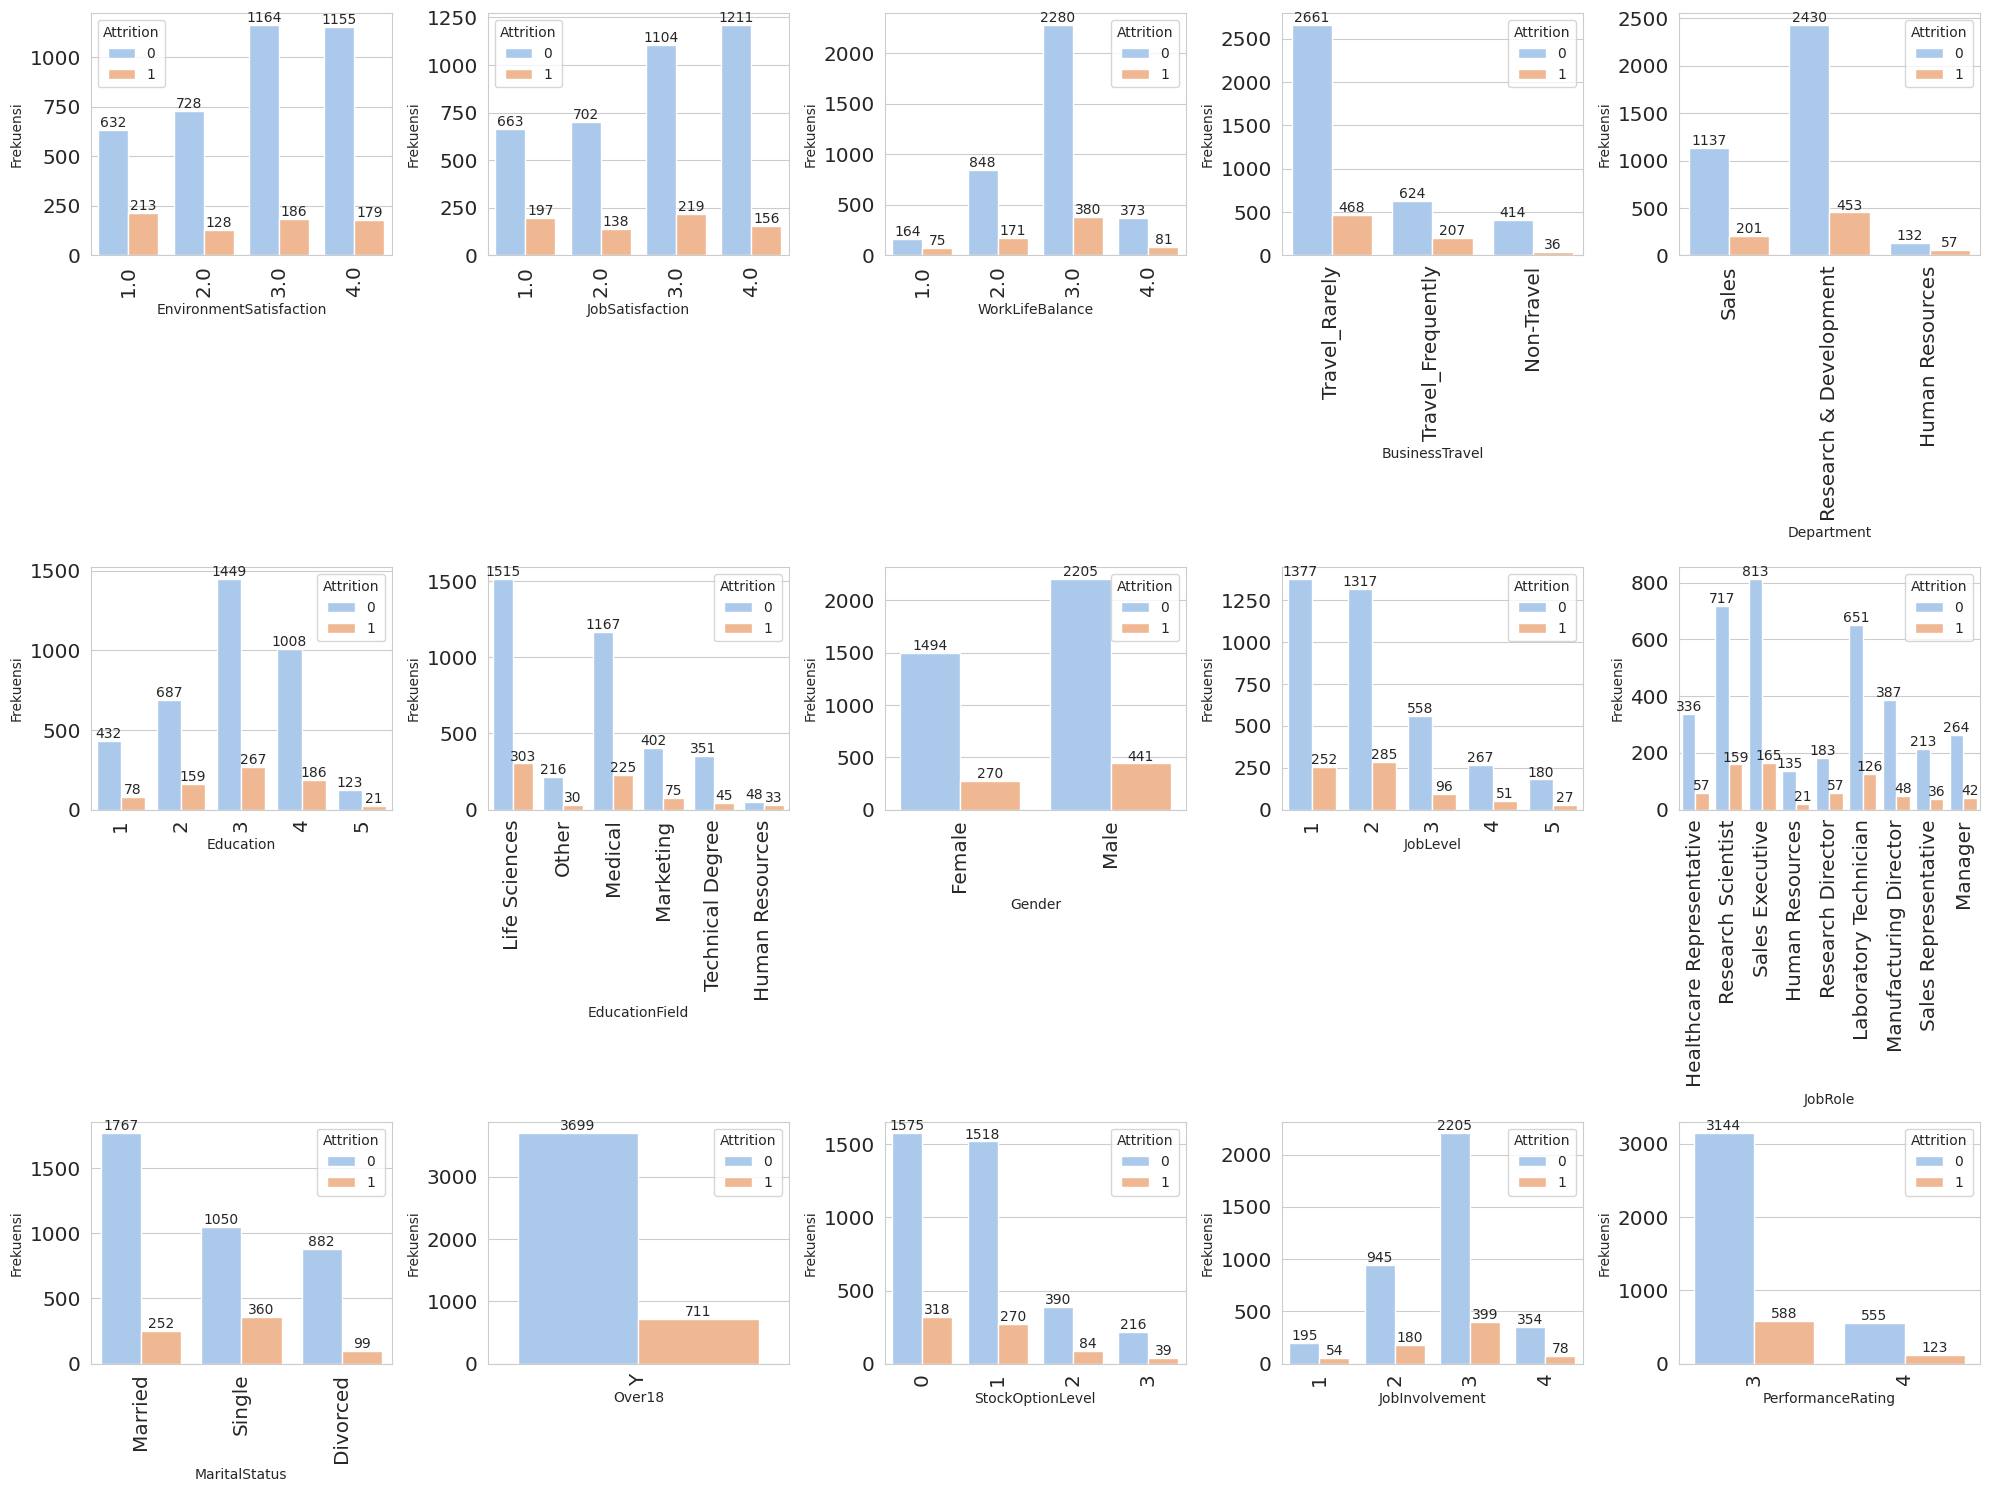

In [ ]:
#Melihat total attrition dari masing-masing feature kategorik
categoricals = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating']
target = ['Attrition']

plt.figure(figsize = (20, 15))
for i in range(len(categoricals)):
  plt.subplot(3, 5, i + 1)
  ax = sns.countplot(data = df_merge, x = categoricals[i], hue = 'Attrition', palette = 'pastel')
  for bars in ax.containers:
      ax.bar_label(bars)

  plt.xticks(rotation = 90)
  plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Hasil Observasi**

**A. Korelasi antara Feature dan Target (Attrition):**

* Age memiliki korelasi negatif (-0.16) dengan Attrition, yang menunjukkan bahwa semakin tua karyawan, kemungkinan untuk meninggalkan perusahaan cenderung lebih rendah.

* TotalWorkingYears dan YearsWithCurrManager memiliki korelasi negatif dengan Attrition masing-masing sebesar -0.17 dan -0.16, mengindikasikan bahwa karyawan dengan pengalaman lebih lama atau yang telah bekerja lama dengan manajer saat ini cenderung kurang mungkin meninggalkan perusahaan.

* MonthlyIncome memiliki korelasi negatif dengan Attrition sebesar -0.031, sehingga kontribusinya mungkin rendah dalam memprediksi tingkat Attrition.

* NumCompaniesWorked memiliki korelasi positif dengan Attrition sebesar 0.042, hal ini menunjukkan bahwa semakin sering karyawan berganti perusahaan, maka semakin besar kemungkinan karyawan untuk meninggalkan perusahaan.

* EnvironmentSatisfaction rendah akan cenderung melakukan atrisi. Karyawan yang tidak merasa nyaman dengan lingkungan kerjanya berpotensi melakukan atrisi dibandingkan dengan karyaawan yang nyaman dengan lingkungan kerjanya.

**B. Korelasi antar Feature**

* Age dan TotalWorkingYears memiliki korelasi positif yang tinggi sebesar 0.68. Hal ini wajar karena semakin tua karyawan, biasanya semakin lama pengalaman kerja mereka.

* YearsAtCompany berkorelasi tinggi dengan TotalWorkingYears (0.63),YearsWithCurrManager (0.77) dan YearsSinceLastPromotion (0.62). Karyawan yang bekerja lebih lama di perusahaan cenderung memiliki lebih banyak pengalaman kerja, bekerja lebih lama dengan manajer saat ini, tetapi cenderung lama tidak dilakukan promosi. Hal ini menunjukkan potensi redundansi antar fitur tersebut.

* YearsSinceLastPromotion berkorelasi positif dengan TotalWorkingYears (0.4), YearsAtCompany (0.62) dan YearsWithCurrManager (0.51). Yang menunjukkan bahwa dipromosikannya seorang karyawan bukan karena lamanya bekerja pada perusahaan dan manager yang sama.

##Business Insight


**Insight 1: Pengaruh Umur dan Lama Pengalaman Terhadap Attrition**

Berdasarkan korelasi antara Age dan TotalWorkingYears dengan Attrition, terlihat bahwa karyawan yang lebih tua dan memiliki pengalaman kerja yang lebih panjang cenderung lebih loyal dan jarang meninggalkan perusahaan. Korelasi negatif yang signifikan antara ketiga variabel ini menunjukkan bahwa karyawan berpengalaman kurang mungkin untuk keluar.

**Rekomendasi:**
* Fokus pada program retensi untuk karyawan muda atau yang memiliki pengalaman kerja lebih singkat.
* Perusahaan dapat mempertimbangkan program mentorship yang menghubungkan karyawan muda dengan yang lebih senior untuk meningkatkan loyalitas dan mengurangi kemungkinan attrition.
* Memberikan peluang pengembangan karier dan pelatihan bagi karyawan muda dapat membantu mereka merasa lebih terikat dengan perusahaan.

**Insight 2: Kepuasan Lingkungan Kerja dan Keseimbangan hidup-kerja Berhubungan dengan Attrition Rendah**

Dari distribusi variabel EnvironmentSatisfaction dan WorkLifeBalance, terlihat bahwa karyawan dengan kepuasan lingkungan kerja dan keseimbangan hidup-kerja yang tinggi cenderung memiliki angka attrition yang lebih rendah.

**Rekomendasi:**
* Investasi dalam program peningkatan lingkungan kerja, seperti fleksibilitas dalam jam kerja, area relaksasi, atau fasilitas yang mendukung kesehatan mental.
* Mengembangkan kebijakan keseimbangan hidup-kerja yang lebih baik, misalnya opsi bekerja dari rumah atau jam kerja yang fleksibel, dapat membantu meningkatkan loyalitas karyawan.

**Insight 3: Tingkat Kenaikan Gaji Berhubungan dengan Attrition**

Variabel PercentSalaryHike menunjukkan sedikit korelasi positif dengan tingkat attrition, yang mungkin menunjukkan bahwa karyawan yang menerima kenaikan gaji yang rendah lebih mungkin untuk meninggalkan perusahaan.

**Rekomendasi:**
* Perusahaan bisa mempertimbangkan untuk mengkaji kembali kebijakan kenaikan gaji, khususnya bagi karyawan yang memiliki performa tinggi atau masa kerja lama.
* Menyediakan insentif tambahan di luar kenaikan gaji standar, seperti bonus kinerja, penghargaan, atau kesempatan promosi, dapat membantu mempertahankan karyawan yang berpotensi tinggi.

**Insight 4: Hubungan Loyalitas Karyawan dan Promosi**

Variabel YearsSinceLastPromotion menjelaskan promosi terakhir yang didapat oleh karyawan. Variabel ini berkorelasi positif dengan variabel TotalWorkingYears, YearsAtCompany, dan YearsWithCurrManager. Loyalitas karyawan tidak terlalu diapresiasi oleh perusahaan.

**Rekomendasi:**
* Mengapresiasi karyawan yang telah menunjukkan loyalitas yaitu mereka yang tidak sering berganti departemen atau perusahaan. Apresiasi tersebut bisa diwujudkan dengan kenaikan promosi atau jabatan yang lebih baik agar ke depannya karyawan merasa lebih diperhatikan oleh perusahaan.

#**Data Pre-Processing**

##Handle Missing Values

In [ ]:
data = df_merge.copy()

In [ ]:
missing_values_before = data.isna().sum().sort_values(ascending=False)
missing_values_before

,0
WorkLifeBalance,38
EnvironmentSatisfaction,25
JobSatisfaction,20
NumCompaniesWorked,19
TotalWorkingYears,9
EmployeeID,0
MonthlyIncome,0
JobInvolvement,0
YearsWithCurrManager,0
YearsSinceLastPromotion,0


In [ ]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].mode()[0])
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0])
data['WorkLifeBalance'] = data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mode()[0])
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median())
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].median())

In [ ]:
missing_values_after = data.isna().sum()
missing_values_after = missing_values_after[missing_values_before.index]
missing_values_after

,0
WorkLifeBalance,0
EnvironmentSatisfaction,0
JobSatisfaction,0
NumCompaniesWorked,0
TotalWorkingYears,0
EmployeeID,0
MonthlyIncome,0
JobInvolvement,0
YearsWithCurrManager,0
YearsSinceLastPromotion,0


##Duplicated Data

In [ ]:
data.duplicated().any()

False

In [ ]:
print('Jumlah data duplikat:', data.duplicated().sum())

Jumlah data duplikat: 0


##Outliers

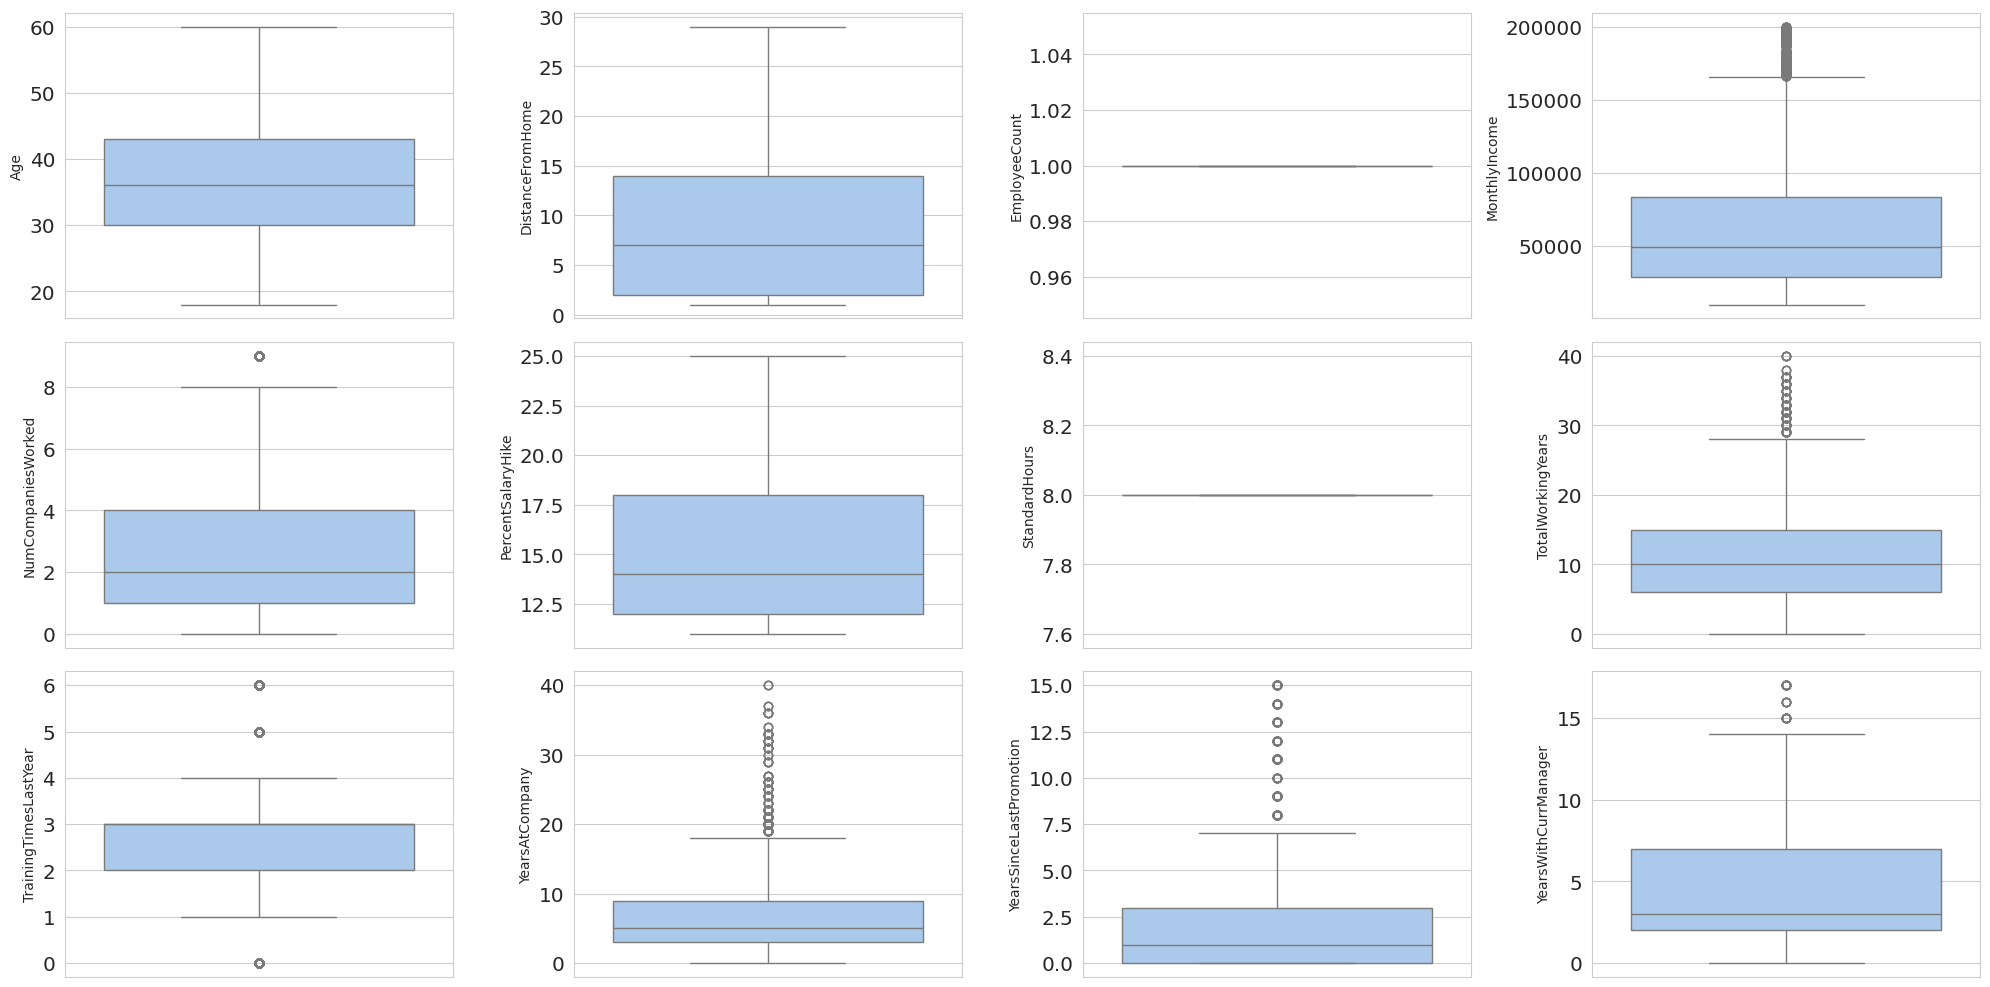

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom numerik yang akan divisualisasikan
numericals = ['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Melihat distribusi masing-masing kolom numerik
plt.figure(figsize = (20, 10))
for i in range(len(numericals)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[numericals[i]], palette = 'pastel', orient = 'v') #Boxplot
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
#Menghitung persentase outliers di setiap kolom numerik
numericals = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

outlier_data = []

for col in numericals:

  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  outliers = data[(data[col] < low_limit) | (data[col] > high_limit)].shape[0]
  outlier_percentage = (outliers / data.shape[0]) * 100
  outlier_data.append({'Kolom': col, 'Persentase Outliers': outlier_percentage})

outlier_df = pd.DataFrame(outlier_data)
outlier_df

,Kolom,Persentase Outliers
0,Age,0.000000
1,DistanceFromHome,0.000000
2,MonthlyIncome,7.755102
3,NumCompaniesWorked,3.537415
4,PercentSalaryHike,0.000000
5,TotalWorkingYears,4.285714
6,TrainingTimesLastYear,16.190476
7,YearsAtCompany,7.074830
8,YearsSinceLastPromotion,7.278912
9,YearsWithCurrManager,0.952381


Karena persentase outliers pada kolom **NumCompaniesWorked**, **TotalWorkingYears** dan **YearsWithCurrManager** < 5%, maka data outliers akan di-drop.

In [ ]:
column_to_clean = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsWithCurrManager']

for col in column_to_clean:

  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  data = data[(data[col] >= low_limit) & (data[col] <= high_limit)]

##Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Kolom kategorikal yang akan di OneHot Encoding dan Label Encoding
columns_onehot = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18']
columns_label = ['Gender', 'Attrition']

for col in columns_onehot:
  df_onehot = pd.get_dummies(data[col], prefix = col)
  df_onehot = df_onehot.astype(int)
  data = pd.concat([data, df_onehot], axis = 1)
  data.drop(columns = col, inplace = True)

for col in columns_label:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])

In [ ]:
columns_to_drop = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'Over18_Y']

#Menghapus kolom dari data
data = data.drop(columns = columns_to_drop, axis = 1)

##Feature Extraction

In [ ]:
#Membuat feature 'PromotionGap' dan 'AverageYearsPerCompany' ke dalam data set
data['PromotionGap'] = data['YearsAtCompany'] - data['YearsSinceLastPromotion']
data['AverageYearsPerCompany'] = data['TotalWorkingYears'] / (data['NumCompaniesWorked'].replace(0, 1))

##Feature Transformation

Sebelum feature transformation, terlebih dahulu dilakukan split antara data test dan data train. Fit scaling dengan standard scaler hanya dilakukan pada data train, kemudian transformasi data test menggunakan parameter scaling yang telah dipelajari dari data train.

In [ ]:
#Split data train dan test
X = data.drop(columns = ['Attrition'])
y = data['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##Class Imbalance

In [ ]:
print(pd.Series(y_train).value_counts())

Attrition
0    2363
1     465
Name: count, dtype: int64


Terjadi class imbalance dengan rasio dari kelas No terhadap kelas Yes adalah sekitar 5.17.
Untuk mencegah kebocoran data (data leakage), akan dilakukan SMOTE terhadap data train saja, tidak pada data test.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Ukuran data sebelum SMOTE:', f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print('Ukuran data setelah SMOTE:', f'X_train_resampled: {X_train_resampled.shape}, y_train_resampled: {y_train_resampled.shape}')

Ukuran data sebelum SMOTE: X_train: (2828, 45), y_train: (2828,)
Ukuran data setelah SMOTE: X_train_resampled: (4726, 45), y_train_resampled: (4726,)


In [ ]:
#Melihat jumlah kelas setelah di-SMOTE
print(pd.Series(y_train_resampled).value_counts())

Attrition
0    2363
1    2363
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_resampled)
X_test_scaled = ss.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_resampled.columns, index = X_train_resampled.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

print("Scaled Training Data:\n", X_train_scaled.head())
print("\nScaled Test Data:\n", X_test_scaled.head())

Scaled Training Data:
    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance       Age  \
0                -0.542890         1.236486         0.329888  0.148231   
1                -0.542890        -1.472710        -1.101094  0.030056   
2                -1.439776         1.236486         0.329888  0.502756   
3                 1.250883         0.333421        -1.101094 -0.442643   
4                -1.439776        -1.472710         0.329888  1.211805   

   DistanceFromHome  Education    Gender  JobLevel  MonthlyIncome  \
0         -1.059919   0.078114 -1.096466  0.000744      -0.898019   
1          0.796019   0.078114  0.912021  0.937727       0.026179   
2         -1.059919   0.078114  0.912021  0.000744       0.071039   
3         -1.059919  -0.934441 -1.096466  0.000744      -0.791749   
4          1.326287   1.090670  0.912021  0.937727      -0.650637   

   NumCompaniesWorked  ...  JobRole_Manufacturing Director  \
0           -0.699831  ...                       -0.280

In [ ]:
X_train_scaled.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionGap,AverageYearsPerCompany
0,-0.542890,1.236486,0.329888,0.148231,-1.059919,0.078114,-1.096466,0.000744,-0.898019,-0.699831,...,-0.280623,-0.219906,-0.43018,-0.456832,-0.204663,-0.424988,-0.721521,1.375605,0.838136,0.654152
1,-0.542890,-1.472710,-1.101094,0.030056,0.796019,0.078114,0.912021,0.937727,0.026179,-0.699831,...,3.563503,-0.219906,-0.43018,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,1.099971,0.879637
2,-1.439776,1.236486,0.329888,0.502756,-1.059919,0.078114,0.912021,0.000744,0.071039,2.115800,...,-0.280623,-0.219906,-0.43018,-0.456832,-0.204663,2.353009,-0.721521,-0.726953,0.838136,-0.473270
3,1.250883,0.333421,-1.101094,-0.442643,-1.059919,-0.934441,-1.096466,0.000744,-0.791749,-0.699831,...,-0.280623,-0.219906,-0.43018,2.188988,-0.204663,-0.424988,1.385962,-0.726953,1.361805,0.879637
4,-1.439776,-1.472710,0.329888,1.211805,1.326287,1.090670,0.912021,0.937727,-0.650637,-0.230559,...,-0.280623,4.547406,-0.43018,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.586013


In [ ]:
X_test_scaled.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionGap,AverageYearsPerCompany
1261,1.250883,1.236486,0.329888,0.030056,-0.131950,1.090670,-1.096466,0.937727,-0.564184,-0.699831,...,-0.280623,-0.219906,2.324606,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.924239
162,-0.542890,0.333421,0.329888,-0.678993,-0.131950,0.078114,-1.096466,0.937727,2.831437,-0.699831,...,3.563503,-0.219906,-0.430180,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,1.623640,1.105121
2218,-1.439776,-1.472710,0.329888,1.684504,-0.397084,2.103225,-1.096466,0.000744,-0.889962,0.238713,...,-0.280623,-0.219906,-0.430180,-0.456832,-0.204663,-0.424988,-0.721521,1.375605,-0.209202,0.353506
3479,-1.439776,0.333421,-1.101094,-1.033517,-0.131950,-0.934441,0.912021,0.000744,0.362845,-0.699831,...,-0.280623,-0.219906,-0.430180,2.188988,-0.204663,2.353009,-0.721521,-0.726953,-0.732871,-0.924239
4344,-0.542890,0.333421,0.329888,0.030056,-0.927352,1.090670,-1.096466,0.000744,0.969976,0.238713,...,-0.280623,4.547406,-0.430180,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.548432


In [ ]:
X_train.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dir

##Feature Selection

- Kolom EmployeeID di-drop karena hanya sebagai identify
- Kolom EmployeeCount, StandardHours dan Over18 dapat di-drop karena tidak memiliki variabilitas

#**Modeling**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

def eval_classification(model, X_train_resampled, y_train_resampled, X_test, y_test):
    #Predictions for training and test sets
    y_pred_train = model.predict(X_train_resampled)
    y_pred_test = model.predict(X_test)

    #Get probabilities for ROC-AUC
    y_pred_proba_train = model.predict_proba(X_train_resampled)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    #Train/Test Metrics
    print("=== Train/Test Metrics ===")
    print(f"Accuracy (Train Set): {accuracy_score(y_train_resampled, y_pred_train):.2f}")
    print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred_test):.2f}")
    print(f"Precision (Test Set): {precision_score(y_test, y_pred_test):.2f}")
    print(f"Recall (Test Set): {recall_score(y_test, y_pred_test):.2f}")
    print(f"F1-Score (Test Set): {f1_score(y_test, y_pred_test):.2f}")
    print(f"ROC-AUC (Train Set): {roc_auc_score(y_train_resampled, y_pred_proba_train):.2f}")
    print(f"ROC-AUC (Test Set): {roc_auc_score(y_test, y_pred_proba_test):.2f}")

    #Confusion Matrix
    print("\n=== Confusion Matrix (Test Set) ===")
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)

    #Visualize Confusion Matrix
    plt.figure(figsize = (5, 4))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {"size": 10})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Test Set)')
    plt.tight_layout()
    plt.show()

  # Cross-validation on training set
    print("\n=== Cross-Validation Metrics (Train Set) ===")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Accuracy
    # Use X_train and y_train for cross-validation, not X_train_resampled and y_train_resampled
    cv_accuracy = cross_validate(
        model, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True
    )
    print(f"Accuracy (Cross-Validation Train Set): {cv_accuracy['train_score'].mean():.2f}")
    print(f"Accuracy (Cross-Validation Test Set): {cv_accuracy['test_score'].mean():.2f}")

    # ROC-AUC
    if y_pred_proba_train is not None:
        cv_roc_auc = cross_validate(
            model, X_train, y_train, cv=cv, scoring='roc_auc', return_train_score=True
        )
        print(f"ROC-AUC (Cross-Validation Train Set): {cv_roc_auc['train_score'].mean():.2f}")
        print(f"ROC-AUC (Cross-Validation Test Set): {cv_roc_auc['test_score'].mean():.2f}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

##Logistic Regression

=== Train/Test Metrics ===
Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.81
Precision (Test Set): 0.42
Recall (Test Set): 0.45
F1-Score (Test Set): 0.43
ROC-AUC (Train Set): 0.91
ROC-AUC (Test Set): 0.79

=== Confusion Matrix (Test Set) ===
[[899 119]
 [108  87]]


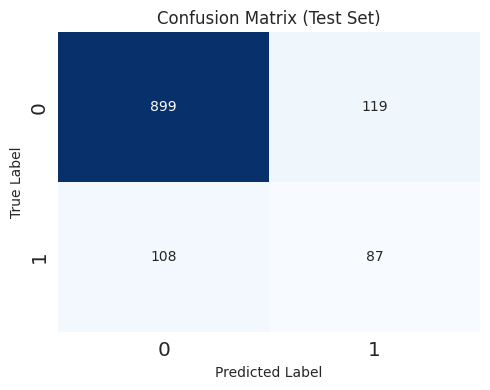


=== Cross-Validation Metrics (Train Set) ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Cross-Validation Train Set): 0.84
Accuracy (Cross-Validation Test Set): 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC (Cross-Validation Train Set): 0.70
ROC-AUC (Cross-Validation Test Set): 0.69


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_resampled)
eval_classification(logreg, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
=== Train/Test Metrics ===
Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.81
Precision (Test Set): 0.42
Recall (Test Set): 0.45
F1-Score (Test Set): 0.43
ROC-AUC (Train Set): 0.91
ROC-AUC (Test Set): 0.79

=== Confusion Matrix (Test Set) ===
[[899 119]
 [108  87]]


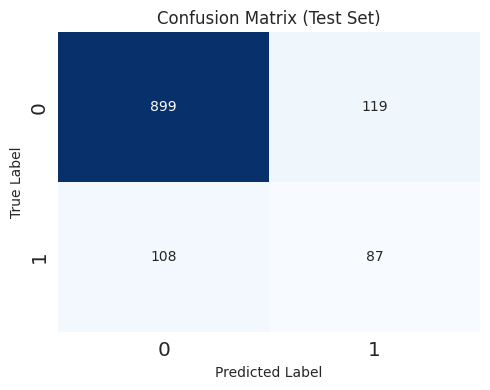


=== Cross-Validation Metrics (Train Set) ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy (Cross-Validation Train Set): 0.85
Accuracy (Cross-Validation Test Set): 0.84
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ROC-AUC (Cross-Validation Train Set): 0.60
ROC-AUC (Cross-Validation Test Set): 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Tuning Hyperparameter LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 5000]
}

logreg_clf = LogisticRegression(random_state = 42)
logreg_cv = RandomizedSearchCV(logreg_clf, params, scoring = 'accuracy', n_jobs = -1, verbose = 1, cv = 5)
logreg_cv.fit(X_train_scaled, y_train_resampled)

eval_classification(logreg_cv, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##Support Vector Machine

=== Train/Test Metrics ===
Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Test Set): 0.91
Recall (Test Set): 0.76
F1-Score (Test Set): 0.83
ROC-AUC (Train Set): 1.00
ROC-AUC (Test Set): 0.96

=== Confusion Matrix (Test Set) ===
[[1003   15]
 [  47  148]]


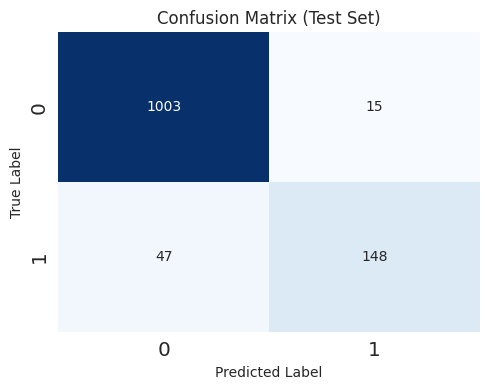


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 0.42
Accuracy (Cross-Validation Test Set): 0.42
ROC-AUC (Cross-Validation Train Set): 0.54
ROC-AUC (Cross-Validation Test Set): 0.54


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', class_weight = 'balanced', probability = True, random_state = 42)
svm.fit(X_train_scaled, y_train_resampled)

eval_classification(svm, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##Decision Tree

=== Train/Test Metrics ===
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.98
Precision (Test Set): 0.96
Recall (Test Set): 0.92
F1-Score (Test Set): 0.94
ROC-AUC (Train Set): 1.00
ROC-AUC (Test Set): 0.96

=== Confusion Matrix (Test Set) ===
[[1011    7]
 [  15  180]]


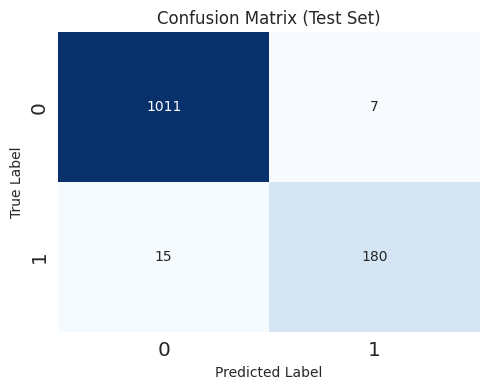


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 1.00
Accuracy (Cross-Validation Test Set): 0.95
ROC-AUC (Cross-Validation Train Set): 1.00
ROC-AUC (Cross-Validation Test Set): 0.92


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_resampled)

eval_classification(dt, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
=== Train/Test Metrics ===
Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.78
Precision (Test Set): 0.36
Recall (Test Set): 0.50
F1-Score (Test Set): 0.42
ROC-AUC (Train Set): 0.88
ROC-AUC (Test Set): 0.75

=== Confusion Matrix (Test Set) ===
[[849 169]
 [ 98  97]]


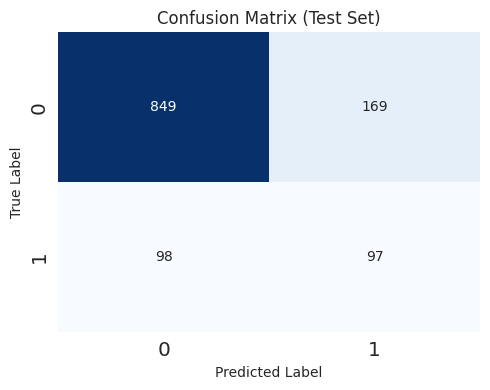


=== Cross-Validation Metrics (Train Set) ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy (Cross-Validation Train Set): 0.87
Accuracy (Cross-Validation Test Set): 0.85
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ROC-AUC (Cross-Validation Train Set): 0.88
ROC-AUC (Cross-Validation Test Set): 0.80


In [ ]:
#Tuning Hyperparameter DecisionTree
from sklearn.model_selection import RandomizedSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20]
}

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_cv = RandomizedSearchCV(tree_clf, params, scoring = 'accuracy', n_jobs = -1, verbose = 1, cv = 5)
tree_cv.fit(X_train_scaled, y_train_resampled)

eval_classification(tree_cv, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##XGBoost

In [ ]:
import sklearn
import xgboost
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

Scikit-learn version: 1.2.2
XGBoost version: 2.1.3


=== Train/Test Metrics ===
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.96
F1-Score (Test Set): 0.98
ROC-AUC (Train Set): 1.00
ROC-AUC (Test Set): 0.99

=== Confusion Matrix (Test Set) ===
[[1018    0]
 [   7  188]]


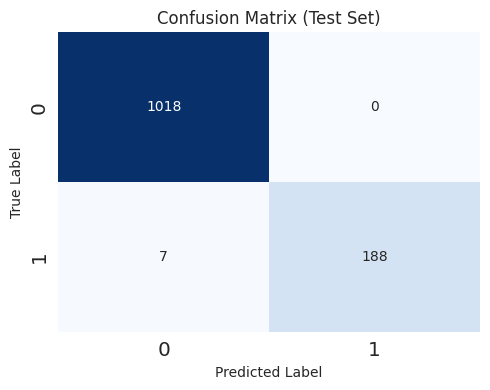


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 1.00
Accuracy (Cross-Validation Test Set): 0.97
ROC-AUC (Cross-Validation Train Set): 1.00
ROC-AUC (Cross-Validation Test Set): 0.96


In [ ]:
from xgboost.sklearn import XGBClassifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_scaled, y_train_resampled)

# Evaluate the model
eval_classification(model_xgb, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

=== Train/Test Metrics ===
Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.85
Precision (Test Set): 0.52
Recall (Test Set): 0.56
F1-Score (Test Set): 0.54
ROC-AUC (Train Set): 0.94
ROC-AUC (Test Set): 0.84

=== Confusion Matrix (Test Set) ===
[[917 101]
 [ 86 109]]


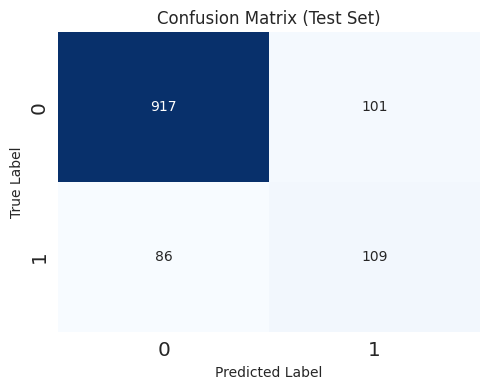


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 0.86
Accuracy (Cross-Validation Test Set): 0.85
ROC-AUC (Cross-Validation Train Set): 0.82
ROC-AUC (Cross-Validation Test Set): 0.78


In [ ]:
#Tuning Hyperparameter XGBoost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

params = {
    'max_depth': [2, 3],
    'min_child_weight': [10, 15, 20],
    'gamma': [0.0, 0.1],
    'subsample': [0.5, 0.6],
    'colsample_bytree': [0.5, 0.6],
    'eta': [0.01, 0.001],
    'n_estimators': [100, 300],
    'scale_pos_weight': [1, 2, 5],
    'tree_method': ['hist'],
    'booster': ['gbtree'],
}

xg = XGBClassifier(random_state = 42)
xg_tuned = RandomizedSearchCV(xg, params, cv = 3, scoring = 'accuracy', n_iter = 20, n_jobs = -1, random_state = 42)
xg_tuned.fit(X_train_scaled,y_train_resampled)

eval_classification(xg_tuned, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##Random Forest

=== Train/Test Metrics ===
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.96
ROC-AUC (Train Set): 1.00
ROC-AUC (Test Set): 1.00

=== Confusion Matrix (Test Set) ===
[[1018    0]
 [  14  181]]


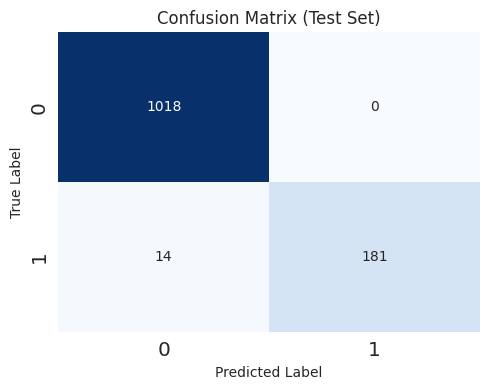


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 1.00
Accuracy (Cross-Validation Test Set): 0.97
ROC-AUC (Cross-Validation Train Set): 1.00
ROC-AUC (Cross-Validation Test Set): 0.98


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, y_train_resampled)

eval_classification(rf, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
=== Train/Test Metrics ===
Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.83
Precision (Test Set): 0.48
Recall (Test Set): 0.62
F1-Score (Test Set): 0.54
ROC-AUC (Train Set): 0.94
ROC-AUC (Test Set): 0.85

=== Confusion Matrix (Test Set) ===
[[890 128]
 [ 75 120]]


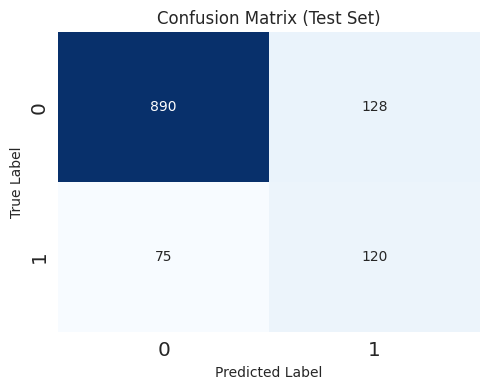


=== Cross-Validation Metrics (Train Set) ===
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy (Cross-Validation Train Set): 0.87
Accuracy (Cross-Validation Test Set): 0.85
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
ROC-AUC (Cross-Validation Train Set): 0.89
ROC-AUC (Cross-Validation Test Set): 0.82


In [ ]:
warnings.filterwarnings('ignore')

#Tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.25, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [30, 40, 50],
    'min_samples_leaf': [10, 15, 20],
    'bootstrap': [True]
}

rf_clf = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(rf_clf, params, scoring = 'accuracy', n_iter = 50, n_jobs = -1, verbose = 2, cv = 3, random_state = 42)
rf_cv.fit(X_train_scaled, y_train_resampled)

eval_classification(rf_cv, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##AdaBoost

=== Train/Test Metrics ===
Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.80
Precision (Test Set): 0.41
Recall (Test Set): 0.57
F1-Score (Test Set): 0.48
ROC-AUC (Train Set): 0.92
ROC-AUC (Test Set): 0.81

=== Confusion Matrix (Test Set) ===
[[860 158]
 [ 83 112]]


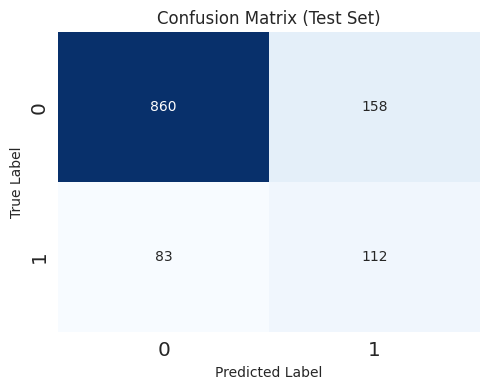


=== Cross-Validation Metrics (Train Set) ===
Accuracy (Cross-Validation Train Set): 0.87
Accuracy (Cross-Validation Test Set): 0.86
ROC-AUC (Cross-Validation Train Set): 0.86
ROC-AUC (Cross-Validation Test Set): 0.80


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train_scaled, y_train_resampled)

eval_classification(ab_clf, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
=== Train/Test Metrics ===
Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.82
Precision (Test Set): 0.44
Recall (Test Set): 0.55
F1-Score (Test Set): 0.49
ROC-AUC (Train Set): 0.95
ROC-AUC (Test Set): 0.84

=== Confusion Matrix (Test Set) ===
[[884 134]
 [ 88 107]]


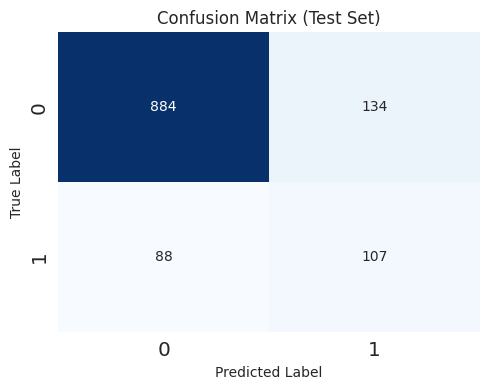


=== Cross-Validation Metrics (Train Set) ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy (Cross-Validation Train Set): 0.88
Accuracy (Cross-Validation Test Set): 0.86
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ROC-AUC (Cross-Validation Train Set): 0.88
ROC-AUC (Cross-Validation Test Set): 0.81


In [ ]:
#Tuning Hyperparameter AdaBoost
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 150, 200],  # Jumlah estimator yang digunakan
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Nilai learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Algoritma untuk boosting
}

ab_clf = AdaBoostClassifier(random_state = 42)
ab_cv = RandomizedSearchCV(ab_clf, params, scoring = 'accuracy', n_jobs = -1, verbose = 1, cv = 5)
ab_cv.fit(X_train_scaled, y_train_resampled)

eval_classification(ab_cv, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

##Feature Importance

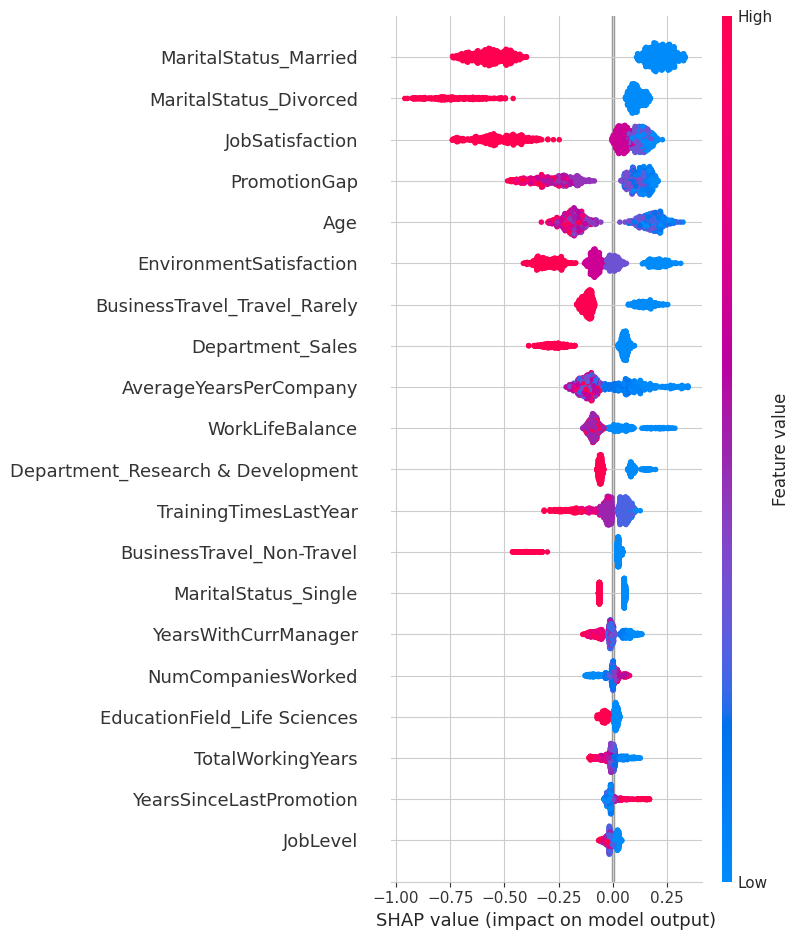

In [ ]:
import shap

# Buat TreeExplainer
explainer = shap.TreeExplainer(xg_tuned.best_estimator_)

# Hitung SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary
shap.summary_plot(shap_values, X_test_scaled)

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

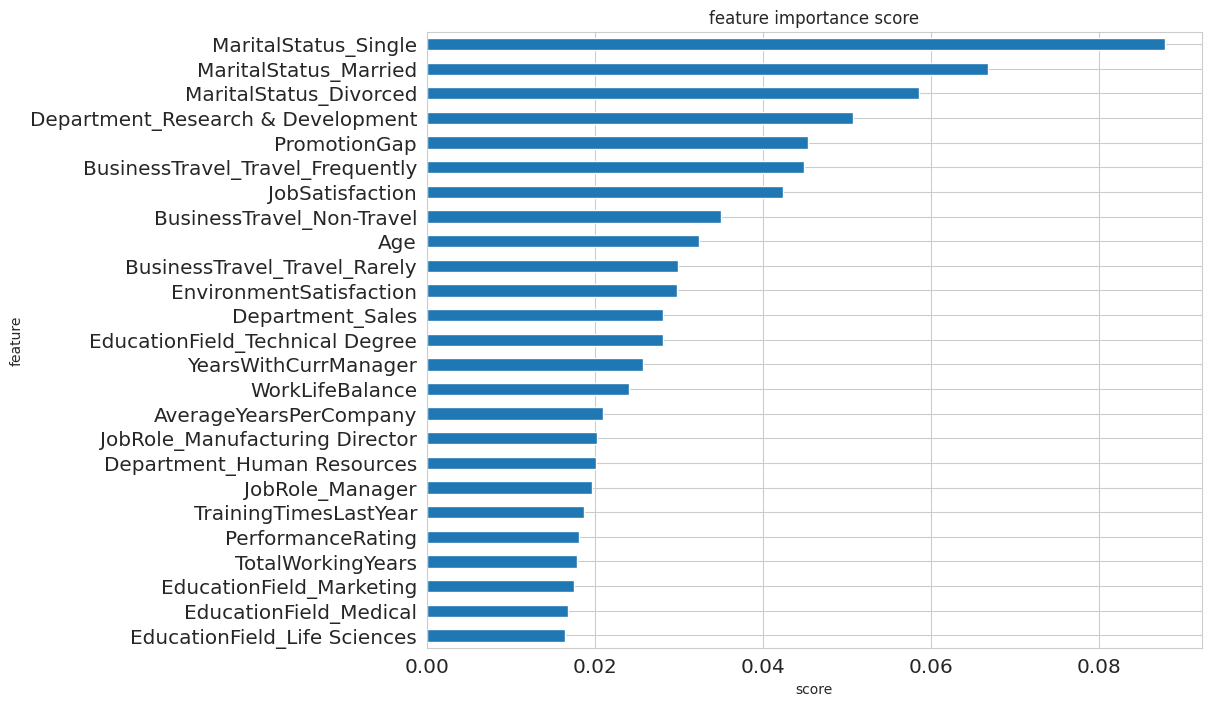

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)